# Обучение нейросети

In [38]:
import os, tensorflow as tf, numpy as np, pandas as pd

from tensorflow import keras
from PIL import Image, ImageOps
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
%matplotlib inline

In [39]:
SIZE_IMAGE = (256, 256)

In [40]:
# Функция для создания списка с путями фото

def create_list_paths(name_folder: str) -> list[str]:
    path = f'./images/{name_folder}'
    if os.path.exists(path):
        return [f'{path}/{image}' for image in os.listdir(path)]
    return []

In [41]:
# Функция для создания numpy массива из фото

def create_array_from_image(list_paths: list[str]) -> np.array:
    output_list = []
    for path in list_paths:
        if os.path.exists(path):
            image = Image.open(path).convert('L')
            image = ImageOps.fit(image, SIZE_IMAGE, Image.Resampling.LANCZOS)
            output_list.append(np.asarray(image))
            # output_list = np.append(output_list, np.asarray(Image.open(path).convert('L')))
    return output_list

In [42]:
dict_key = {
    'cat' : 0,
    'dog' : 1,
    'guinea_pig' : 2,
    'cow' : 3,
    'chamomile' : 4,
    'rose' : 5,
    'bell' : 6,
    'tilip' : 7,
    'circle' : 8,
    'triangle' : 9,
    'rectangle' : 10,
    'square' : 11
}

In [43]:
X = []
y = []

In [44]:
for key in dict_key.keys():
    list_paths = create_list_paths(key)
    list_array = create_array_from_image(list_paths)
    X.extend(list_array)
    y.extend([dict_key[key] for _ in range(len(list_array))])

In [45]:
len(X)

11905

In [46]:
len(y)

11905

In [47]:
X = np.array(X, dtype=np.uint8)
y = np.array(y, dtype=np.uint8)

In [48]:
X.shape, y.shape

((11905, 256, 256), (11905,))

In [49]:
x_train, x_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)

In [50]:
x_train.shape, x_test.shape

((7976, 256, 256), (3929, 256, 256))

In [51]:
y_train.shape, y_test.shape

((7976,), (3929,))

In [52]:
x_train = x_train / 255
x_test = x_test / 255

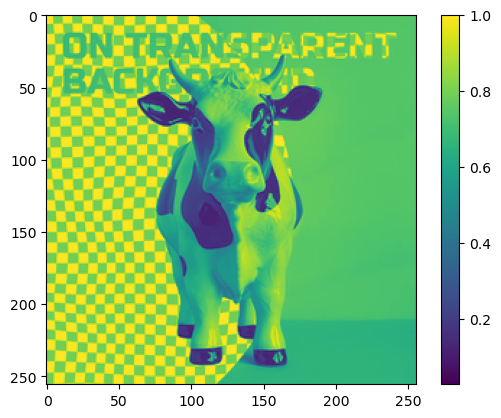

In [53]:
plt.figure()
plt.imshow(x_train[0])
plt.colorbar()
plt.grid(False)
plt.show()

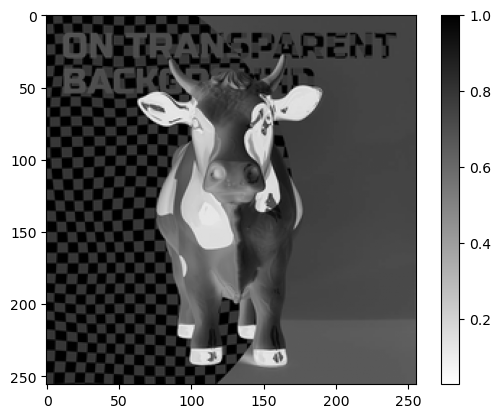

In [54]:
plt.figure()
plt.imshow(x_train[0], cmap=plt.cm.binary)
plt.colorbar()
plt.grid(False)
plt.show()

In [167]:
model = keras.Sequential([keras.layers.Flatten(input_shape=SIZE_IMAGE),
                         keras.layers.Dense(64, activation='sigmoid'),
                         keras.layers.Dense(12, activation='softmax')])

In [168]:
model.compile(optimizer=tf.keras.optimizers.SGD(), loss=keras.losses.sparse_categorical_crossentropy, metrics=['accuracy'], steps_per_execution=1)

In [169]:
model.summary()

Model: "sequential_24"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ flatten_26 (Flatten)                 │ (None, 65536)               │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_56 (Dense)                     │ (None, 64)                  │       4,194,368 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_57 (Dense)                     │ (None, 12)                  │             780 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 4,195,148 (16.00 MB)

 Trainable params: 4,195,148 (16.00 MB)

 Non-trainable params: 0 (0.00 B)

In [170]:
model.fit(x_train, y_train, epochs=500)

Epoch 1/500
250/250 ━━━━━━━━━━━━━━━━━━━━ 2s 8ms/step - accuracy: 0.1027 - loss: 2.4865
Epoch 2/500
250/250 ━━━━━━━━━━━━━━━━━━━━ 2s 8ms/step - accuracy: 0.1434 - loss: 2.4414
Epoch 3/500
250/250 ━━━━━━━━━━━━━━━━━━━━ 2s 8ms/step - accuracy: 0.1873 - loss: 2.3863
Epoch 4/500
250/250 ━━━━━━━━━━━━━━━━━━━━ 2s 8ms/step - accuracy: 0.2071 - loss: 2.3344
Epoch 5/500
250/250 ━━━━━━━━━━━━━━━━━━━━ 2s 8ms/step - accuracy: 0.2224 - loss: 2.2878
Epoch 6/500
250/250 ━━━━━━━━━━━━━━━━━━━━ 2s 8ms/step - accuracy: 0.2515 - loss: 2.2368
Epoch 7/500
250/250 ━━━━━━━━━━━━━━━━━━━━ 2s 8ms/step - accuracy: 0.2654 - loss: 2.2027
Epoch 8/500
250/250 ━━━━━━━━━━━━━━━━━━━━ 2s 8ms/step - accuracy: 0.2786 - loss: 2.1713
Epoch 9/500
250/250 ━━━━━━━━━━━━━━━━━━━━ 2s 8ms/step - accuracy: 0.2946 - loss: 2.1353
Epoch 10/500
250/250 ━━━━━━━━━━━━━━━━━━━━ 2s 8ms/step - accuracy: 0.3118 - loss: 2.1023
Epoch 11/500
250/250 ━━━━━━━━━━━━━━━━━━━━ 2s 8ms/step - accuracy: 0.3202 - loss: 2.0764
Epoch 12/500
250/250 ━━━━━━━━━━━━━━━━━━━━

In [171]:
test_loss, test_acc = model.evaluate(x_test, y_test)
print(f'Test accuracy: {test_acc}\nTest loss: {test_loss}')

123/123 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - accuracy: 0.3981 - loss: 1.9637
Test accuracy: 0.3980656564235687
Test loss: 1.9636762142181396


In [85]:
predictions = model.predict(x_train)

250/250 ━━━━━━━━━━━━━━━━━━━━ 4s 16ms/step


In [61]:
np.argmax(predictions[0])

np.int64(4)

In [62]:
y_train[0]

np.uint8(3)

In [63]:
plt.figure()
plt.imshow(x_train[0])
plt.colorbar()
plt.grid(False)